# 4) sentiment analysis of Emotions dataset

In [4]:
import pandas as pd
data_train=pd.read_csv("/content/train.csv",encoding ="ISO-8859-1")
data_test=pd.read_csv("/content/test.csv",encoding ="ISO-8859-1")

In [5]:
data_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
data_test.head()


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
data_train = data_train[['text', 'sentiment']]
data_train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
data_test=data_test[['text','sentiment']]
data_test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [9]:
data_train.isnull().sum()

text         1
sentiment    0
dtype: int64

In [10]:
data_train['text'].fillna('missing',inplace=True)


In [11]:
data_train.isnull().sum()

text         0
sentiment    0
dtype: int64

In [12]:
data_test.isnull().sum()

text         1281
sentiment    1281
dtype: int64

In [13]:
data_test.dropna(inplace=True)
data_test.isnull().sum()

text         0
sentiment    0
dtype: int64

In [14]:
data_test.shape


(3534, 2)

In [15]:
data_train.shape

(27481, 2)

# Text preprocessing

In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
port_stem=PorterStemmer()
stop_words = set(stopwords.words('english'))

In [18]:
def stemming(content):
    words = word_tokenize(content)
    stemmed_words = [port_stem.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    stemmed_content = ' '.join(stemmed_words)
    return stemmed_content

In [19]:
data_train['stemmed_content']=data_train['text'].apply(stemming)
data_train['stemmed_content']

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                            son put releas alreadi bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wonder rake client made clear forc dev learn n...
27478    yay good enjoy break probabl need hectic weeke...
27479                                                worth
27480                           flirt go atg smile yay hug
Name: stemmed_content, Length: 27481, dtype: object

In [20]:
data_test['stemmed_content']=data_test['text'].apply(stemming)
data_test['stemmed_content']

0                                   last session day http
1       shanghai also realli excit precis skyscrap gal...
2       recess hit veroniqu branquinho quit compani shame
3                                              happi bday
4                                               http like
                              ...                        
3529                                    im tire sleep tri
3530    alon old hous thank net keep aliv kick whoever...
3531    know mean littl dog sink depress want move som...
3532                  next youtub video gon na love video
3533                          http omgssh ang cute ng bbi
Name: stemmed_content, Length: 3534, dtype: object

In [21]:
sentiment_mapping = {'neutral': 0, 'negative': -1, 'positive': 1}
data_train['sentiment_numerical']= data_train['sentiment'].map(sentiment_mapping)
data_train['sentiment_numerical'].head()

0    0
1   -1
2   -1
3   -1
4   -1
Name: sentiment_numerical, dtype: int64

In [22]:
sentiment_mapping = {'neutral': 0, 'negative': -1, 'positive': 1}
data_test['sentiment_numerical']= data_test['sentiment'].map(sentiment_mapping)
data_test['sentiment_numerical'].head()

0    0
1    1
2   -1
3    1
4    1
Name: sentiment_numerical, dtype: int64

In [23]:
x=data_train['stemmed_content'].values
y=data_train['sentiment_numerical'].values

In [24]:
x1=data_test['stemmed_content'].values
y1=data_test['sentiment_numerical'].values

# Text vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x)
print(x_train)

  (0, 6207)	0.39439041960459637
  (0, 12779)	0.9189429780590908
  (1, 4076)	0.5811676784310105
  (1, 13201)	0.5355123599402765
  (1, 9888)	0.2879837258589514
  (1, 13131)	0.33177964127100656
  (1, 14206)	0.4271513609679642
  (2, 2155)	0.7669106715206576
  (2, 1856)	0.6417538639601119
  (3, 438)	0.5734238931285884
  (3, 8716)	0.49413959996494455
  (3, 7718)	0.6534608592224463
  (4, 1871)	0.4569166739917799
  (4, 448)	0.37709443344513865
  (4, 12676)	0.5053790930649074
  (4, 12295)	0.39852729891235716
  (4, 14189)	0.4845564008528747
  (5, 4570)	0.3754896295955808
  (5, 5637)	0.40065209898129
  (5, 12451)	0.44020728429991146
  (5, 1471)	0.2563501211450184
  (5, 11843)	0.40065209898129
  (5, 13553)	0.4914948122204037
  (5, 7280)	0.19208940894439758
  (6, 3297)	0.6047029463061756
  :	:
  (27477, 263)	0.3508200959697521
  (27477, 8709)	0.23412019841463674
  (27477, 9293)	0.20212624709921614
  (27477, 5599)	0.27875318318921904
  (27477, 17243)	0.20970181145215291
  (27477, 10494)	0.1606385235

In [26]:
x_test_vectorized = vectorizer.transform(x1)
print(x_test_vectorized)

  (0, 13505)	0.7355559300704977
  (0, 8641)	0.4524894012691306
  (0, 7280)	0.3836412846419623
  (0, 3777)	0.32715467319831104
  (1, 15996)	0.3188739786228672
  (1, 13529)	0.3812658679552208
  (1, 12522)	0.17347414640346823
  (1, 12045)	0.3924182261099804
  (1, 6252)	0.1509366671951399
  (1, 5928)	0.3924182261099804
  (1, 5055)	0.23019726436123397
  (1, 2792)	0.34574470277222125
  (1, 1602)	0.408136592104575
  (1, 460)	0.23019726436123397
  (2, 13552)	0.43590648316930436
  (2, 12559)	0.5684151620542464
  (2, 12370)	0.38455486002442657
  (2, 7064)	0.38455486002442657
  (2, 3162)	0.4371782939957123
  (3, 6722)	0.512760518887232
  (3, 1314)	0.858531682741235
  (4, 8859)	0.6952384198588575
  (4, 7280)	0.718779200834414
  (5, 16890)	0.6929600315780422
  (5, 16612)	0.6473372224125011
  :	:
  (3530, 7241)	0.19039744550425589
  (3530, 6635)	0.20619802730725822
  (3530, 438)	0.22333693333413063
  (3530, 395)	0.28048715089068554
  (3531, 16769)	0.18833117384861803
  (3531, 15876)	0.43771343923337

# Model training using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y)

LogisticRegression(max_iter=1000)

# Accuracy

In [28]:
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy = accuracy_score(y ,x_train_prediction )
print("training accuracy: ",training_data_accuracy)

training accuracy:  0.7990975583130163


In [29]:
x_test_prediction=model.predict(x_test_vectorized)
testing_data_accuracy = accuracy_score(y1,x_test_prediction )
print("testing accuracy :",testing_data_accuracy)

testing accuracy : 0.7091114883984154


# Confusion Matrix

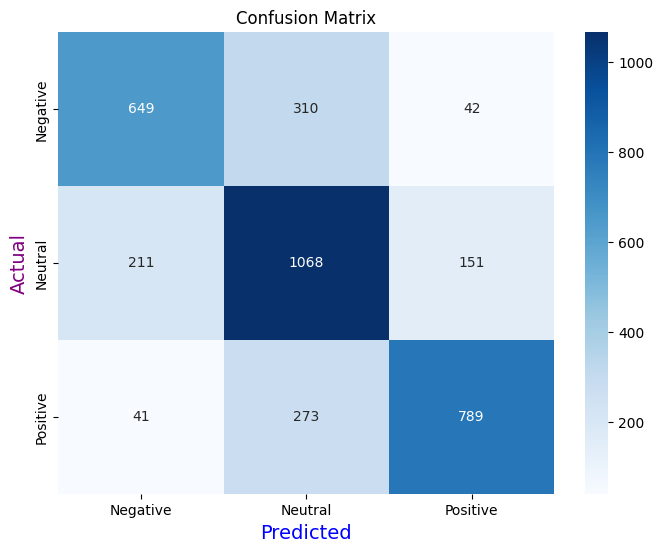

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = model.predict(x_test_vectorized)
cm = confusion_matrix(y1, y_predicted)
class_labels = ['Negative', 'Neutral', 'Positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()


# Model training using Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y)

MultinomialNB()

# Accuracy

In [32]:
x_train_prediction=clf.predict(x_train)
training_data_accuracy = accuracy_score(y ,x_train_prediction )
print("training accuracy: ",training_data_accuracy)

training accuracy:  0.7663840471598559


In [33]:
x_test_prediction=clf.predict(x_test_vectorized)
testing_data_accuracy = accuracy_score(y1 ,x_test_prediction )
print("testing accuracy :",testing_data_accuracy)

testing accuracy : 0.6352574985851727


# Confusion Matrix

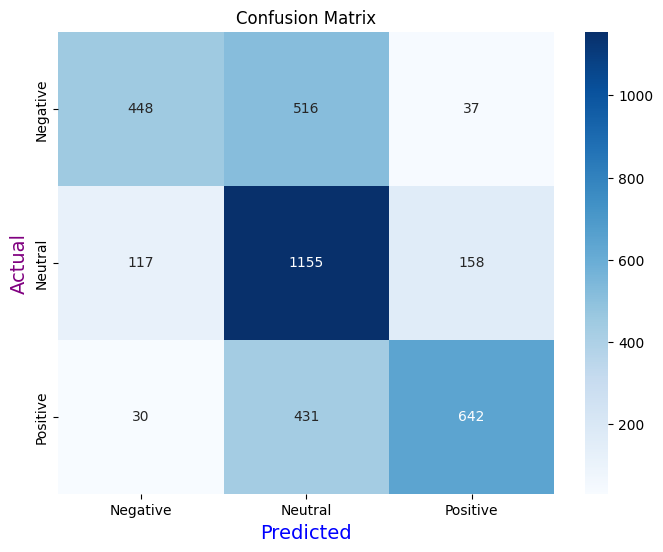

In [34]:
y_predicted = clf.predict(x_test_vectorized)
cm = confusion_matrix(y1, y_predicted)
class_labels = ['Negative', 'Neutral', 'Positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()
